# Perkenalan

##
Milestone 1

Nama  : Guardian Tri Anggoro
Batch : RMT -024

Program ini dibuat untuk melakukan Analisis Data Valorant Player Statistic Pada Episode 4 Act3



# Identifikasi Masalah

## SMART method

-	Case : Saya merupakan `META analist` dari tim RRQ . RRQ pada saat ini sering mengalami kekalahan dalam semua ajang kompetisi valorant. Sehingga saya diminta untuk melakukan
    analisis mencari META terbaru sehingga dapat membantu tim RRQ mendapatkan kemenangan kembali.

-   Specific : Dapat mengidentifikasi faktor-faktor apa saja yang mempengaruhi winrate dalam game valorant berdasarkan Agent, Senjata, Rank, dan Region.

-   Measurable : Meningkatkan presentase kemenangan RRQ sebesar 30% dari 4 kompetisi yang akan diikuti

-   Achievable : Dengan menganalisis Data dari Valorant Leaderboard Statistic dapat menemukan insight baru terkait META dalam game valorant

-   Relevant : Meningkatkan winrate sangat krusial untuk menciptakan kepercayaan diri player dan team. Serta membantu meningkatkan daya tarik terhadap penggemar.

-   Time-Bound : Target ini berlangsung selama 1 tahun kedepan. Untuk semua ajang kompetisi valorant dimana team ini akan berkompetisi dalam 4 turnamen internasional.

-   Problem Statement: Team RRQ sedang mengalami kekalahan dalam semua ajang kompetisi. Dengan mengindetifikasi faktor-faktor winrate berdasarkan Agent, Senjata, Rank, dan Region yang bertujuan untuk menciptakan META yang dapat membantu Team RRQ dalam meningkatkan winrate sebesar 30% selama 1 tahun kedepan di semua ajang kompetisi sehingga dapat meningkatkan kepercayaan diri untuk player dan juga team.

## 5W + 1H

1.  Apakah Senjata yang digunakan mempengaruhi jumlah kill dalam game valorant? (analisis stastika inferencial)
2.  Berapa rentang headshot percentage yang dimiliki oleh player radiant? (analisis statistik deskriptif)
3.  Region mana saja yang memiliki tingkat headshot tertinggi dalam game valorant? (visualisasi)
4.  Rank dan Jenis Senjata apa saja yang memiliki clutch terbanyak dalam rank high tier di game valorant? (visualisasi)
5.  Siapa Agent yang memiliki jumlah win tertinggi dalam setiap agent type di game valorant? (visualisasi)
6.  Bagimana Killround mempengaruhi Score Round ?(visualisasi)


# Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


# Data Loading

## Data Exploration

### Load Data

In [2]:
# Load Data
data = pd.read_csv('val_stats.csv')
data.head(10)

C:\Users\Guardian\AppData\Local\Temp\ipykernel_92\477855752.py:2: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('val_stats.csv')


,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
5,NaN,Decay,#GODK,Radiant,134.1,"1,038",26.0,2,162,94,...,Phantom,35,62,3,144,Spectre,29,65,6,135
6,NaN,Osias,#1212,Radiant,163.4,"1,472",25.2,7,186,92,...,Phantom,32,64,5,369,Sheriff,48,50,2,253
7,NaN,Knights RIKU,#KRN,Radiant,153.3,510,17.5,2,112,64,...,Operator,6,93,1,318,Marshal,35,65,0,100
8,NaN,RaijuACE,#3131,Radiant,153.7,"1,181",24.6,2,189,132,...,Vandal,36,59,5,626,Phantom,22,69,9,34
9,NaN,dawn,#24k,Radiant,153.6,339,20.8,1,56,44,...,Operator,2,98,1,163,Spectre,23,70,6,85


Sumber Dataset : https://www.kaggle.com/datasets/aliibrahim10/valorant-stats

### Data Summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85675 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

Pada Dataframe Player Valorant dapat diketahui bahwa :
1.  Terdapat 37 column pada dataframe.
2.  Terdapat 85678 value data.
3.  Terdapat dtypes yang terdiri dari float sebanyak 6 column, int sebanyak 15 column, dan object sebanyak 17.
4.  Pada kesalahan dtypes pada column headshots, firstbloods, kills, assists, deaths, gun1_kills dan gun2_kills.
5.  Terdapat beberapa column yang tidak diperlukan.
6.  Terdapat beberapa value yang tidak diperlukan.
7.  Terdapat missing value pada beberapa data.

### Data List Column

In [4]:
data.columns

Index(['region', 'name', 'tag', 'rating', 'damage_round', 'headshots',
       'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods',
       'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills',
       'score_round', 'wins', 'win_percent', 'agent_1', 'agent_2', 'agent_3',
       'gun1_name', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills',
       'gun2_name', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills',
       'gun3_name', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills'],
      dtype='object')

Pada list column diatas, terdapat beberapa column yang saya tidak perlukan seperti :
1.  tag
2.  firstbloods
3.  aces
4.  most kill
5.  score round
6.  agent2
7.  agent3
8.  gun1head
9.  gun1body
10. gun1legs
11. gun2head
12. gun2body
13. gun2legs
14. gun3head
15. gun3body
16. gun3legs


### Unique in Column Rating

In [5]:
data['rating'].unique()

array(['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1', 'Silver 2',
       'Gold 2', 'Diamond 3', 'Gold 1', 'Unrated', 'Platinum 1',
       'Bronze 3', 'Gold 3', 'Bronze 2', 'Diamond 2', 'Silver 3',
       'Silver 1', 'Platinum 2', 'Diamond 1', 'Platinum 3'], dtype=object)

Pada unique column rating, saya hanya membutuhkan player yang memiliki rating tier teratas valorant yaitu radiant dan immortal 3

### Unique in Column Region

In [6]:
data['region'].unique()

array([nan, 'EU', 'AP', 'KR', 'BR', 'LAT'], dtype=object)

Pada unique colum region, didapatkan bahwa:
1.  Nan : North America
2.  EU : Europe
3.  AP : Asia Pasific
4.  KR : Korea
5.  BR : Brazil
6.  LAT : Latin America

Saya akan mengubah isi column data berdasarkan singkatannya agar dapat lebih dipahami oleh pembaca.

# Data Cleaning

### Column yang tidak diperlukan pada dataframe


In [7]:
# Removing data column not needed
data2 = data.drop(['tag', 'name', 'first_bloods', 'flawless', 'aces', 'most_kills', 'kd_ratio', 'assists', 'deaths','agent_2', 'agent_3', 'gun1_head', 'gun1_body', 'gun1_legs',
                   'gun2_head', 'gun2_body', 'gun2_legs','gun3_name', 'gun2_name', 'gun2_kills','gun3_kills','gun3_head', 'gun3_body', 'gun3_legs'], axis=1)

### Value yang tidak diperlukan dalam column rating

In [8]:
# Removing value not needed in rating column
data2 = data2.drop(data2[data2['rating'] == 'Silver 2'].index)
data2 = data2.drop(data2[data2['rating'] == 'Gold 2'].index)
data2 = data2.drop(data2[data2['rating'] == 'Diamond 3'].index)
data2 = data2.drop(data2[data2['rating'] == 'Gold 1'].index)
data2 = data2.drop(data2[data2['rating'] == 'Unrated'].index)
data2 = data2.drop(data2[data2['rating'] == 'Platinum 1'].index)
data2 = data2.drop(data2[data2['rating'] == 'Bronze 3'].index)
data2 = data2.drop(data2[data2['rating'] == 'Gold 3'].index)
data2 = data2.drop(data2[data2['rating'] == 'Bronze 2'].index)
data2 = data2.drop(data2[data2['rating'] == 'Diamond 2'].index)
data2 = data2.drop(data2[data2['rating'] == 'Silver 3'].index)
data2 = data2.drop(data2[data2['rating'] == 'Silver 1'].index)
data2 = data2.drop(data2[data2['rating'] == 'Platinum 1'].index)
data2 = data2.drop(data2[data2['rating'] == 'Platinum 2'].index)
data2 = data2.drop(data2[data2['rating'] == 'Diamond 1'].index)
data2 = data2.drop(data2[data2['rating'] == 'Platinum 3'].index) 

### Mengubah value pada column

In [9]:
# mengubah value pada column headshots
data2['headshots'] = data['headshots'].str.replace(',', '')

# mengubah value pada column headshots
data2['kills'] = data['kills'].str.replace(',', '')

# mengubah value pada column gun1_kills
data2['gun1_kills'] = data['gun1_kills'].str.replace(',', '')

# mengubah value pada column region
data2['region'] = data['region'].replace({'EU' : 'Europe', 'AP' : 'Asia Pasific', 'KR' : 'Korea', 'BR' :'Brazil', 'LAT' : 'Latin America'})

### Mengubah nama pada column

In [10]:
# Mengubah nama column pada dataframe
data2.rename(columns = {'agent_1':'agent', 'gun1_name':'primary_weapon',
                              'gun1_kills':'primary_kills'}, inplace = True)

### Mengubah Datatype

In [11]:
# mengubah data type
data2['headshots'] = data2['headshots'].astype(int)
data2['kills'] = data2['kills'].astype(int)
data2['primary_kills'] = data2['primary_kills'].astype(int)


# mengecek data info
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85574 entries, 0 to 85677
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64714 non-null  object 
 1   rating            85574 non-null  object 
 2   damage_round      85574 non-null  float64
 3   headshots         85574 non-null  int32  
 4   headshot_percent  85574 non-null  float64
 5   clutches          85574 non-null  int64  
 6   kills             85574 non-null  int32  
 7   kills_round       85574 non-null  float64
 8   score_round       85574 non-null  float64
 9   wins              85574 non-null  int64  
 10  win_percent       85574 non-null  float64
 11  agent             85574 non-null  object 
 12  primary_weapon    85574 non-null  object 
 13  primary_kills     85574 non-null  int32  
dtypes: float64(5), int32(3), int64(2), object(4)
memory usage: 8.8+ MB


### Menambah Column Agent Type berdasarkan nama agent

In [12]:
# Membuat for loop untuk pengelompokan data agent
agenttype2 = []
for i in data2['agent']:
    if i == 'Yoru' :
        agenttype2.append('Duelist')
    elif i == 'Jett' :
        agenttype2.append('Duelist')
    elif i == 'Raze' :
        agenttype2.append('Duelist')
    elif i == 'Reyna' :
        agenttype2.append('Duelist')
    elif i == 'Neon' :
        agenttype2.append('Duelist')
    elif i == 'Phoenix' :
        agenttype2.append('Duelist')
    elif i == 'Chamber' :
        agenttype2.append('Sentinel')
    elif i == 'Sage' :
        agenttype2.append('Sentinel')
    elif i == 'Cypher' :
        agenttype2.append('Sentinel')
    elif i == 'Killjoy' :
        agenttype2.append('Sentinel')
    elif i == 'Fade' :
        agenttype2.append('Initiator')
    elif i == 'KAY/O' :
        agenttype2.append('Initiator')
    elif i == 'Sova' :
        agenttype2.append('Initiator')
    elif i == 'Breach' :
        agenttype2.append('Initiator')
    elif i == 'Skye' :
        agenttype2.append('Initiator')
    elif i == 'Omen' :
        agenttype2.append('Controller')
    elif i == 'Viper' :
        agenttype2.append('Controller')
    elif i == 'Brimstone' :
        agenttype2.append('Controller')
    elif i == 'Astra' :
        agenttype2.append('Controller')
    
data2['agent_type'] = agenttype2

### Menemukan dan Handling Duplicate Data

In [13]:
# Menghitung duplicate data dalam dataframe
duplicate = data2.duplicated().sum()
print(f'jumlah duplicate data adalah : {duplicate}')

jumlah duplicate data adalah : 1094


In [14]:
# Menghapus duplicate data dalam dataframe
data2.drop_duplicates(inplace=True)

# Mengecek kembali duplicate data dalam dataframe
data2.duplicated().sum()

0

### Membagi Data Categorical dengan Numerical

In [15]:
# Membuat data numericals
numericals = data2[['damage_round', 'headshots', 'headshot_percent', 'clutches', 'kills', 'kills_round', 'score_round', 'wins',
               'win_percent', 'primary_kills']].copy()

# Membuat data categoricals
categoricals = data2[['region', 'rating', 'agent', 'primary_weapon', 'agent_type']].copy()

#### Summary Data Numericals

In [16]:
# Melakukan describe pada data numericals
numericals.describe()

,damage_round,headshots,headshot_percent,clutches,kills,kills_round,score_round,wins,win_percent,primary_kills
count,84480.000000,84480.000000,84480.000000,84480.000000,84480.000000,84480.000000,84480.000000,84480.000000,84480.000000,84480.000000
mean,142.822299,458.606877,23.604678,66.360251,723.234399,0.758138,218.236413,23.791347,53.887253,346.022088
std,16.445814,372.108567,5.187634,53.113825,574.376596,0.098007,26.300829,18.364546,11.351292,287.959720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.800000,185.000000,20.000000,27.000000,297.000000,0.700000,202.100000,10.000000,48.100000,137.000000
50%,142.000000,367.000000,23.300000,54.000000,588.000000,0.800000,216.700000,20.000000,52.900000,273.000000
75%,151.800000,631.000000,26.800000,92.000000,1000.000000,0.800000,232.600000,33.000000,58.800000,473.000000
max,340.600000,5261.000000,83.300000,488.000000,6016.000000,2.000000,550.500000,170.000000,100.000000,3845.000000


Pada data numericals didapatkan bahwa :
-   Damage round :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 142.822400
    3.  memiliki nilai standar deviasi dengan angka 16.445758
    4.  memiliki nilai median dengan 142
-   headshots :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 458.586589
    3.  memiliki nilai standar deviasi dengan angka 372.107941
    4.  memiliki nilai median dengan 367
-   headshot_percent :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 23.604952 %
    3.  memiliki nilai standar deviasi dengan angka 5.187771
    4.  memiliki nilai median dengan 23.3
-   clutches :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 66.357235
    3.  memiliki nilai standar deviasi dengan angka 53.113775
    4.  memiliki nilai median dengan 54
-   kills :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 723.201113
    3.  memiliki nilai standar deviasi dengan angka 574.377283
    4.  memiliki nilai median dengan 588
-  kills_round :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 0.758138
    3.  memiliki nilai standar deviasi dengan angka 0.098007
    4.  memiliki nilai median dengan 0.8
-  score_round :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 218.236720
    3.  memiliki nilai standar deviasi dengan angka 26.300621
    4.  memiliki nilai median dengan 216.7
-  wins :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 23.790270
    3.  memiliki nilai standar deviasi dengan angka 18.364575
    4.  memiliki nilai median dengan 20
-  win_percent :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 53.888011
    3.  memiliki nilai standar deviasi dengan angka 11.352688
    4.  memiliki nilai median dengan 52.9
-  primary_kills :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 287.958446
    3.  memiliki nilai standar deviasi dengan angka 11.352688
    4.  memiliki nilai median dengan 273
-  secondary_kills :
    1.  total data sejumlah 84485 data
    2.  memiliki nilai rata-rata 116.755613
    3.  memiliki nilai standar deviasi dengan angka 110.849347
    4.  memiliki nilai median dengan 84


#### Summary Data Categoricals

In [17]:
categoricals.describe()

,region,rating,agent,primary_weapon,agent_type
count,63713,84480,84480,84480,84480
unique,5,4,19,16,4
top,Europe,Immortal 1,Chamber,Vandal,Duelist
freq,32206,50510,19258,72827,30547


In [18]:
for col in categoricals:
  print(f"Nilai dari {col} column :")
  print(data2[col].value_counts(), '\n')

Nilai dari region column :
Europe           32206
Asia Pasific     19043
Brazil            6916
Latin America     3268
Korea             2280
Name: region, dtype: int64 

Nilai dari rating column :
Immortal 1    50510
Immortal 2    20528
Immortal 3    10858
Radiant        2584
Name: rating, dtype: int64 

Nilai dari agent column :
Chamber      19258
Jett         11794
Reyna        11044
Raze          5937
Omen          5831
Sova          5737
Fade          5345
Sage          5091
Viper         3515
Brimstone     3362
KAY/O         1925
Skye          1748
Neon          1066
Killjoy        616
Breach         591
Yoru           571
Cypher         459
Astra          455
Phoenix        135
Name: agent, dtype: int64 

Nilai dari primary_weapon column :
Vandal      72827
Phantom     10969
Operator      407
Judge          85
Odin           61
Spectre        46
Sheriff        23
Guardian       18
Ghost          16
Classic         8
Frenzy          7
Marshal         3
Shorty          3
Bulldog  

### Melihat Distribusi Data dengan Skewness

In [19]:
# Melihat Skewness pada numericals
numericals.skew()

damage_round        0.451493
headshots           1.560750
headshot_percent    0.497684
clutches            1.493728
kills               1.460132
kills_round         0.402446
score_round         0.520314
wins                1.376155
win_percent         0.317449
primary_kills       1.699214
dtype: float64

In [20]:
# Membagi data dengan spesifikasi normal atau skewness

# untuk menampung kolom yang masuk dalam skewness normal
normal = []  
# untuk menampung kolom yang masuk dalam skewness skewed
skewed = [] 

# untuk mencari kolom mana yang skewed atau normal
for column in numericals:  
    skewness = numericals[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal.append(column)  # masuk ke variabel penampung normal

print(f'Kolom Numerik yang termasuk dalam skewed adalah {skewed}')
print(f'Kolom Numerik yang termasuk dalam normal adalah {normal}')

Kolom Numerik yang termasuk dalam skewed adalah ['headshots', 'clutches', 'kills', 'score_round', 'wins', 'primary_kills']
Kolom Numerik yang termasuk dalam normal adalah ['damage_round', 'headshot_percent', 'kills_round', 'win_percent']


### Melihat Outlier Pada Column Numericals Berdasarkan Distribusi Data.

#### Metode Test-Z Score

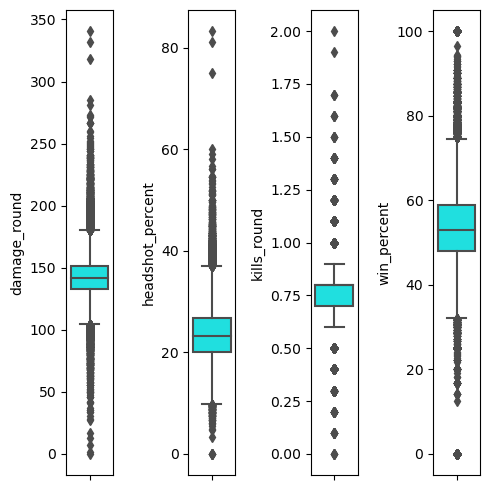

In [21]:
# Melihat distribusi data pada data yang memiliki normal distribusi apakah memiliki outlier?
plt.figure(figsize=(5,5))

features = normal
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data2[features[i]], color='cyan')
    plt.tight_layout()

Pada gambar diatas dapat dikatakan bahwa pada setiap column yang berdistribusi normal memiliki outlier. Sehingga untuk menghandle data berdistribusi normal yang memiliki outlier
Digunakan metode distribusi normal Test Z score

In [22]:
# mencari banyak outlier dengan IQR
Q1 = numericals[normal].quantile(0.25)
Q3 = numericals[normal].quantile(0.75)
IQR = Q3 - Q1
# menghitung lower bound dan upper bound
LB = Q1 - 3 * IQR
UB = Q3 + 3 * IQR
# mengecek apakah nilai memiliki nilai lebih dari upperbound atau nilai memiliki nilai lebih rendah dari lowerbound
Outliers = numericals[normal][(numericals[normal] < LB) | (numericals[normal] > UB)].count()
# Melakukan Handling outlier
No_outlier = numericals[normal][(numericals[normal]>=LB) & (numericals[normal]<=UB)]
print('Jumlah Outliers pada setiap column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(Outliers, columns=['(Jumlah Outliers)'])
# menampilkan rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Jumlah Outliers pada setiap column:

--------------------------------------------------
                  (Jumlah Outliers)
damage_round                    321
headshot_percent                 62
kills_round                     302
win_percent                    1710


<Axes: >

<Figure size 500x500 with 0 Axes>

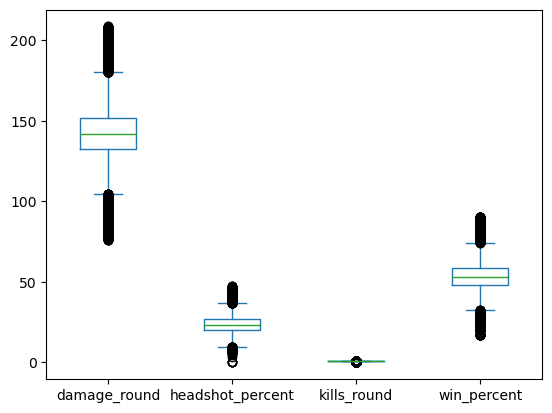

In [23]:
# Melihat distribusi data setelah outlier di handling.
plt.figure(figsize=(5,5))
No_outlier.plot(kind='box')

Pada gambar diatas, walaupun outlier sudah dilakukan handling pada setiap column data yang berdistribusi normal. 
Outlier pada data tetap ada, tetapi konidisi outlier pada setiap column membaik. Jika dibandingkan dengan gamabar sebelumnya.

#### Metode Tukey's Rule

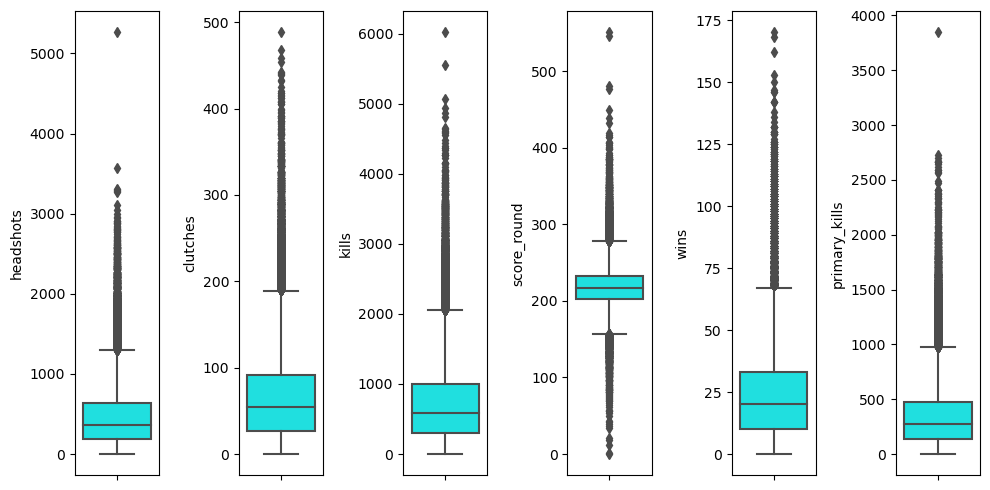

In [24]:
# Melihat distribusi data pada data yang memiliki distribusi skeweness apakah memiliki outlier?
plt.figure(figsize=(10,5))

features = skewed
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data2[features[i]], color='cyan')
    plt.tight_layout()

Pada gambar diatas dapat dikatakan bahwa pada setiap column yang berdistribusi skewed memiliki outlier. Sehingga untuk menghandle data berdistribusi skewed yang memiliki outlier
Digunakan metode distribusi skew tukeys rule

In [25]:
# mencari banyak outlier dengan IQR
Q1 = numericals[skewed].quantile(0.25)
Q3 = numericals[skewed].quantile(0.75)
IQR = Q3 - Q1
# menghitung lower bound dan upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# # mengecek apakah nilai memiliki lebih dari upperbound atau nilai lebih rendah dari lowerbound
Outliers = numericals[skewed][(numericals[skewed] < LB) | (numericals[skewed] > UB)].count()
No_outlier1 = numericals[skewed][(numericals[skewed]>=LB) & (numericals[skewed]<=UB)]
print('Jumlah Outliers pada setiap column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(Outliers, columns=['(Jumlah Outliers)'])
# menampilkan rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Jumlah Outliers pada setiap column:

--------------------------------------------------
               (Jumlah Outliers)
headshots                   2998
clutches                    2748
kills                       2765
score_round                 2518
wins                        2513
primary_kills               3248


<Axes: >

<Figure size 500x500 with 0 Axes>

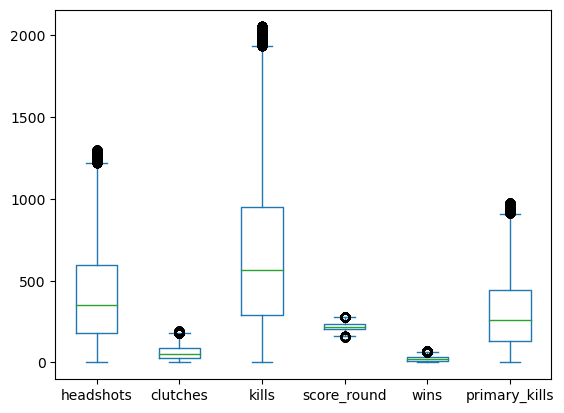

In [26]:
# Melihat distribusi data setelah outlier di handling.
plt.figure(figsize=(5,5))
No_outlier1.plot(kind='box')

Pada gambar diatas, walaupun outlier sudah dilakukan handling pada setiap column data yang berdistribusi skewed. 
Outlier pada data tetap ada, tetapi konidisi outlier pada setiap column membaik. Jika dibandingkan dengan gambar sebelumnya.

### Menggabungkan Kembali data Normal dan Skewed yang sudah dihandling outlier

In [27]:
# Menggabungkan data categoricals dengan data numerical yang sudah dihandling outlier
datacapped = pd.concat([categoricals,No_outlier,No_outlier1],axis = 1)
datacapped.head(5)

,region,rating,agent,primary_weapon,agent_type,damage_round,headshot_percent,kills_round,win_percent,headshots,clutches,kills,score_round,wins,primary_kills
0,NaN,Radiant,Fade,Vandal,Initiator,135.8,24.9,0.7,59.6,992.0,140.0,1506.0,208.8,59.0,802.0
1,NaN,Radiant,Chamber,Vandal,Sentinel,170.3,28.3,1.0,65.8,879.0,122.0,1608.0,270.6,52.0,689.0
2,NaN,Radiant,Yoru,Vandal,Duelist,147.5,24.0,0.8,65.6,720.0,117.0,1115.0,227.8,42.0,444.0
3,NaN,Radiant,Jett,Vandal,Duelist,178.2,37.3,1.0,62.8,856.0,83.0,1134.0,277.0,32.0,754.0
4,NaN,Radiant,Jett,Vandal,Duelist,149.8,24.4,0.8,62.8,534.0,71.0,869.0,230.9,32.0,419.0


### Checking Missing Value

In [28]:
# Menampilkan informasi data kembali
datacapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84480 entries, 0 to 85677
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            63713 non-null  object 
 1   rating            84480 non-null  object 
 2   agent             84480 non-null  object 
 3   primary_weapon    84480 non-null  object 
 4   agent_type        84480 non-null  object 
 5   damage_round      84159 non-null  float64
 6   headshot_percent  84418 non-null  float64
 7   kills_round       84178 non-null  float64
 8   win_percent       82770 non-null  float64
 9   headshots         81482 non-null  float64
 10  clutches          81732 non-null  float64
 11  kills             81715 non-null  float64
 12  score_round       81962 non-null  float64
 13  wins              81967 non-null  float64
 14  primary_kills     81232 non-null  float64
dtypes: float64(10), object(5)
memory usage: 10.3+ MB


Dari data terbaru diatas, kita mengetahui bahwa terdapat beberapa data yang mempunyai missing value dikarenakan adanya handling outliers.
Column - Column tersebut adalah :
1.  damage_round
2.  headshot_percent
3.  kills_round
4.  win_percent
5.  headshots
6.  clutches
7.  kills
8.  score_round
9.  wins
10. primary_kills
11. secondary_kills

Dari column yang memiliki missing value, saya akan mengisinya dengan nilai rata-rata data per masising masing column

### Handling Missing Value

In [29]:
# Handling missing value untuk column Region
datacapped['region'] = datacapped['region'].fillna('North America')

# Handling missing value untuk column damage round
datacapped['damage_round'].fillna(value = datacapped.damage_round.mean(), inplace = True)

# Handling missing value untuk column headshot percent
datacapped['headshot_percent'].fillna(value = datacapped.headshot_percent.mean(), inplace = True)

# Handling missing value untuk column kills round
datacapped['kills_round'].fillna(value = datacapped.kills_round.mean(), inplace = True)

# Handling missing value untuk column win percent
datacapped['win_percent'].fillna(value = datacapped.win_percent.mean(), inplace = True)

# Handling missing value untuk column headshot
datacapped['headshots'].fillna(value = datacapped.headshots.mean(), inplace = True)

# Handling missing value untuk column clutches
datacapped['clutches'].fillna(value = datacapped.clutches.mean(), inplace = True)

# Handling missing value untuk column kills
datacapped['kills'].fillna(value = datacapped.kills.mean(), inplace = True)

# Handling missing value untuk column score round
datacapped['score_round'].fillna(value = datacapped.score_round.mean(), inplace = True)

# Handling missing value untuk column wins
datacapped['wins'].fillna(value = datacapped.wins.mean(), inplace = True)

# Handling missing value untuk column primary kills
datacapped['primary_kills'].fillna(value = datacapped.primary_kills.mean(), inplace = True)


datacapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84480 entries, 0 to 85677
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            84480 non-null  object 
 1   rating            84480 non-null  object 
 2   agent             84480 non-null  object 
 3   primary_weapon    84480 non-null  object 
 4   agent_type        84480 non-null  object 
 5   damage_round      84480 non-null  float64
 6   headshot_percent  84480 non-null  float64
 7   kills_round       84480 non-null  float64
 8   win_percent       84480 non-null  float64
 9   headshots         84480 non-null  float64
 10  clutches          84480 non-null  float64
 11  kills             84480 non-null  float64
 12  score_round       84480 non-null  float64
 13  wins              84480 non-null  float64
 14  primary_kills     84480 non-null  float64
dtypes: float64(10), object(5)
memory usage: 10.3+ MB


Jumlah data-data pada setiap column sudah memiliki data yang sama yaitu 84485, sehingga missing value sudah di handling

### Mengubah Datatype

In [30]:
# mengubah data type
datacapped['headshots'] = datacapped['headshots'].astype(int)
datacapped['kills'] = datacapped['kills'].astype(int)
datacapped['primary_kills'] = datacapped['primary_kills'].astype(int)
datacapped['damage_round'] = datacapped['damage_round'].astype(int)
datacapped['kills_round'] = datacapped['kills_round'].astype(int)
datacapped['clutches'] = datacapped['clutches'].astype(int)
datacapped['score_round'] = datacapped['score_round'].astype(int)
datacapped['wins'] = datacapped['wins'].astype(int)
datacapped['headshot_percent'] = datacapped['headshot_percent'].astype(int)
datacapped['win_percent'] = datacapped['win_percent'].astype(int)
# mengecek data info
datacapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84480 entries, 0 to 85677
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   region            84480 non-null  object
 1   rating            84480 non-null  object
 2   agent             84480 non-null  object
 3   primary_weapon    84480 non-null  object
 4   agent_type        84480 non-null  object
 5   damage_round      84480 non-null  int32 
 6   headshot_percent  84480 non-null  int32 
 7   kills_round       84480 non-null  int32 
 8   win_percent       84480 non-null  int32 
 9   headshots         84480 non-null  int32 
 10  clutches          84480 non-null  int32 
 11  kills             84480 non-null  int32 
 12  score_round       84480 non-null  int32 
 13  wins              84480 non-null  int32 
 14  primary_kills     84480 non-null  int32 
dtypes: int32(10), object(5)
memory usage: 7.1+ MB


## Melakukan Save Pada Data Bersih

In [31]:
datacapped.to_csv('ValorantBersih.csv')

# Analisis dan Perhitungan

## Load Data

### Informasi Pada Setiap Column

-   region : Valorant server area
-   rating : Valorant rank
-   agent  : Character Valorant Hero/Agent
-   agent type : Character Type Agent
-   primary_weapon : valorant weapon
-   damage round : Rata-rata damage per round yang diberikan player
-   headshot_percent : presentasi player menembak mengenai kepala lawan
-   kills_round :   Rata-Rata kill per round player
-   win_percent : Presentase kemenangan player
-   headshot :  jumlah / total player menembak mengenai kepala lawan
-   clucthes : jumlah keberhasilan player dalam memenangkan round dimana situasi tim kalah jumlah pemain dengan tim lawan 
-   kills : jumlah player dalam membunuh lawan
-   score_round :   Rata-rata dari total combat score player
-   wins : jumlah kemenangan player 
-   primary_kills : jumlah kill yang dilakukan menggunakan senjata primary_weapon

In [32]:
dataframe = pd.read_csv('ValorantBersih.csv')
dataframe

,Unnamed: 0,region,rating,agent,primary_weapon,agent_type,damage_round,headshot_percent,kills_round,win_percent,headshots,clutches,kills,score_round,wins,primary_kills
0,0,North America,Radiant,Fade,Vandal,Initiator,135,24,0,59,992,140,1506,208,59,802
1,1,North America,Radiant,Chamber,Vandal,Sentinel,170,28,1,65,879,122,1608,270,52,689
2,2,North America,Radiant,Yoru,Vandal,Duelist,147,24,0,65,720,117,1115,227,42,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84477,85675,Latin America,Radiant,Chamber,Vandal,Sentinel,158,30,0,52,613,70,919,247,26,373
84478,85676,Latin America,Immortal 3,Brimstone,Vandal,Controller,155,22,0,66,132,23,204,235,8,89
84479,85677,Latin America,Radiant,Neon,Vandal,Duelist,164,20,0,50,1127,136,1822,253,49,939


In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84480 entries, 0 to 84479
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        84480 non-null  int64 
 1   region            84480 non-null  object
 2   rating            84480 non-null  object
 3   agent             84480 non-null  object
 4   primary_weapon    84480 non-null  object
 5   agent_type        84480 non-null  object
 6   damage_round      84480 non-null  int64 
 7   headshot_percent  84480 non-null  int64 
 8   kills_round       84480 non-null  int64 
 9   win_percent       84480 non-null  int64 
 10  headshots         84480 non-null  int64 
 11  clutches          84480 non-null  int64 
 12  kills             84480 non-null  int64 
 13  score_round       84480 non-null  int64 
 14  wins              84480 non-null  int64 
 15  primary_kills     84480 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 10.3+ MB


## 1. Apakah Senjata yang digunakan mempengaruhi jumlah kill dalam game valorant? 

In [34]:
dataframe['primary_weapon'].unique()

array(['Vandal', 'Operator', 'Phantom', 'Judge', 'Odin', 'Guardian',
       'Spectre', 'Classic', 'Ghost', 'Sheriff', 'Marshal', 'Shorty',
       'Bulldog', 'Ares', 'Frenzy', 'Bucky'], dtype=object)

### Mengelompokan Data

In [35]:
# Mengelompokan primary weapon berdasarkan weapon type
Senjata = []
for i in dataframe['primary_weapon'] :
    if i == 'Vandal' :
        Senjata.append('Riffle')
    elif i == 'Operator' :
        Senjata.append('Sniper')
    elif i == 'Phantom' :
        Senjata.append('Riffle')
    elif i == 'Judge' :
        Senjata.append('Shotgun')
    elif i == 'Guardian' :
        Senjata.append('Riffle')
    elif i == 'Odin' :
        Senjata.append('MachineGun')
    elif i == 'Spectre' :
        Senjata.append('SubMachineGun')
    elif i == 'Ghost' :
        Senjata.append('Pistol')
    elif i == 'Classic' :
        Senjata.append('Pistol')
    elif i == 'Sheriff' :
        Senjata.append('Pistol')
    elif i == 'Marshal' :
        Senjata.append('Sniper')
    elif i == 'Shorty' :
        Senjata.append('Pistol')
    elif i == 'Bulldog' :
        Senjata.append('SubMachineGun')
    elif i == 'Ares' :
        Senjata.append('MachineGun')
    elif i == 'Frenzy' :
        Senjata.append('Pistol')
    elif i == 'Operator' :
        Senjata.append('Sniper')
    elif i == 'Bucky' :
        Senjata.append('Shotgun')

dataframe['weapon_type'] = Senjata
dataframe['weapon_type'].value_counts()

Riffle           83814
Sniper             410
Shotgun             87
MachineGun          63
Pistol              57
SubMachineGun       49
Name: weapon_type, dtype: int64

In [36]:
# Mengelompokan weapon type dengan angka
WeaponType = []
for i in dataframe['weapon_type'] :
    if i == 'Riffle' :
        WeaponType.append(1)
    elif i == 'Sniper' :
        WeaponType.append(2)
    elif i == 'Shotgun' :
        WeaponType.append(3)
    elif i == 'MachineGun' :
        WeaponType.append(4)
    elif i == 'Pistol' :
        WeaponType.append(5)
    elif i == 'SubMachineGun':
        WeaponType.append(6)

dataframe['number_weapon_type'] = WeaponType

### Chi-Square Test

- H0 = Primary Weapon / Senjata tidak mempengaruhi kill
- H1 = Primary Weapon / Senjata mempengaruhi kill

In [37]:
#Contingency Table
contingency_table = pd.crosstab(dataframe['primary_kills'],dataframe['number_weapon_type'])
contingency_table

number_weapon_type,1,2,3,4,5,6
primary_kills,,,,,,
0,1,0,0,0,2,0
1,8,2,0,0,5,1
2,18,0,0,0,7,5
...,...,...,...,...,...,...
975,15,0,0,0,0,0
976,15,0,0,0,0,0
977,13,0,0,0,0,0


In [38]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


Dari hasil perthitungan p value menggunakan metode chi-square didapatkan bahwa :
- karena menggunakan keyakinan 95%, sehingga critial value 5% / 0,05 
- p-value < critical value
- H0 Ditolak , Sehingga digunakan H1
- Kesimpulan : Primary Weapon / Senjata tidak mempengaruhi kill

### Menampilkan 5 Senjata dengan Kill Terbanyak

In [39]:
top5_weapon = (dataframe
            .groupby(['primary_weapon'])
            .agg(total_kills=('primary_kills','sum'))
            .reset_index()
            .sort_values('total_kills',ascending=False)
            .head(5)
            )
top5_weapon

,primary_weapon,total_kills
15,Vandal,23388143
11,Phantom,2672855
10,Operator,84986
7,Judge,25454
9,Odin,15219


## 2. Berapa rentang headshot percentage yang dimiliki oleh player radiant?

In [40]:
# Mengambil data dengan rating Radiant Saja
data_radiant = dataframe.loc[dataframe['rating'] == 'Radiant']
data_radiant.head(5)

,Unnamed: 0,region,rating,agent,primary_weapon,agent_type,damage_round,headshot_percent,kills_round,win_percent,headshots,clutches,kills,score_round,wins,primary_kills,weapon_type,number_weapon_type
0,0,North America,Radiant,Fade,Vandal,Initiator,135,24,0,59,992,140,1506,208,59,802,Riffle,1
1,1,North America,Radiant,Chamber,Vandal,Sentinel,170,28,1,65,879,122,1608,270,52,689,Riffle,1
2,2,North America,Radiant,Yoru,Vandal,Duelist,147,24,0,65,720,117,1115,227,42,444,Riffle,1
3,3,North America,Radiant,Jett,Vandal,Duelist,178,37,1,62,856,83,1134,277,32,754,Riffle,1
4,4,North America,Radiant,Jett,Vandal,Duelist,149,24,0,62,534,71,869,230,32,419,Riffle,1


In [41]:
# Menghitung Rata-Rata
mean = data_radiant['headshot_percent'].mean()
# Menghitung Modus
modus = data_radiant['headshot_percent'].mode()[0]
# Menghitung Median
median = data_radiant['headshot_percent'].median()
# Menghitung Standar Deviasi
std = data_radiant['headshot_percent'].std()

print(f'Rata-Rata Headshot Percent : {mean}')
print(f'Median Headshot Percent : {median}')
print(f'Modus Headshot Percent : {modus}')
print(f'Standar Deviasi Headshot Percent : {std}')

Rata-Rata Headshot Percent : 24.872291021671828
Median Headshot Percent : 25.0
Modus Headshot Percent : 22
Standar Deviasi Headshot Percent : 4.997942125378989


Dari Hasil Perhitungan Central Tedency (Mean, Median dan Standar Deviasi) didapatkan bahwa :
median memiliki nilai yang lebih besar dari standar deviasi yaitu 25 > 4.99. Sehingga distribusi datanya sangat besar.

## 3. Region mana saja yang memiliki tingkat headshot tertinggi dalam game valorant?

In [42]:
fig3 = px.pie(dataframe, values='headshot_percent', names='region', color_discrete_sequence=px.colors.sequential.Plasma,
              title='Prensetase Headshot Berdasarkan Region')
fig3.show()

Dari pie chart diatas, didapatkan bahwa negara dengan tingkat persentase headshot tertinggi adalah 
1.  Europe sebesar 39.2%
2.  Noth America sebesar 24.4%
3.  Asia Pasific sebesar 22.2%
4.  Brazil sebesar 7.78%
5.  Latin America sebesar 3.75%
6.  Korea sebesar 2.7%

## 4. Rank dan Jenis Senjata apa saja yang memiliki clutch terbanyak dalam rank high tier di game valorant?

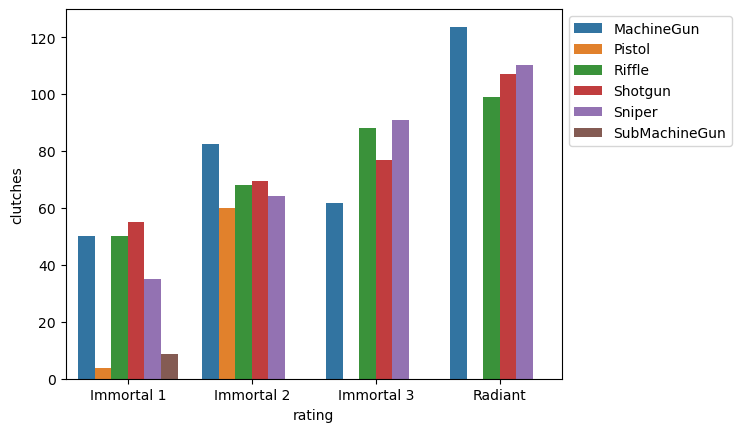

In [43]:
Rank = dataframe.groupby(['rating', 'weapon_type'])['clutches'].mean().reset_index()
sns.barplot(data=Rank, x='rating', y='clutches', orient='v', hue='weapon_type')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Dari Grafik Diatas, didapatkan bahwa :
1.  Pada Rank Immortal 1, jumlah clutch tertinggi dilakukan dengan menggunakan tipe senjata Shotgun
2.  Pada Rank Immortal 2, jumlah clutch tertinggi dilakukan dengan menggunakan tipe senjata MachineGun
3.  Pada Rank Immortal 3, jumlah clutch tertinggi dilakukan dengan menggunakan tipe senjata Sniper
4.  Pada Rank Radiant, jumlah clutch tertinggi dilakukan dengan menggunakan tipe senjata Machine Gun

## 5. Siapa Agent yang memiliki jumlah kemenangan tertinggi dalam setiap agent type di game valorant?

In [44]:
top10_agent = (dataframe
            .groupby(['agent', 'agent_type'])
            .agg(total_win=('wins','sum'))
            .reset_index()
            .sort_values('total_win',ascending=False)
            .head(10)
            )
top10_agent

,agent,agent_type,total_win
3,Chamber,Sentinel,444947
6,Jett,Duelist,279177
13,Reyna,Duelist,237195
...,...,...,...
14,Sage,Sentinel,95850
17,Viper,Controller,70221
2,Brimstone,Controller,66135


<Axes: xlabel='agent', ylabel='total_win'>

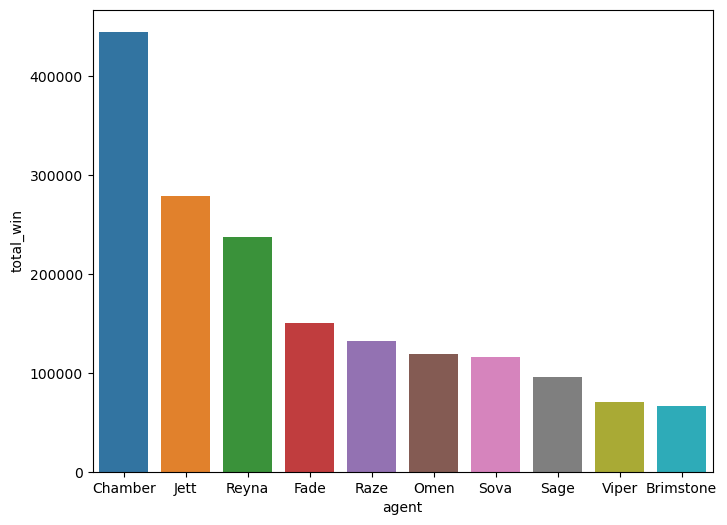

In [45]:
plt.figure(figsize=(8,6))
top10_agent['agent'] = top10_agent['agent'].astype(str)
sns.barplot(data=top10_agent, x='agent', y='total_win')

Dari Grafik diatas didapatkan informasi bahwa :
1.  Untuk Agent Type Duelist yang memiliki jumlah kemenangan paling tinggi adalah :
    -   Jett dengan total kemenangan 279178 games
2.  Untuk Agent Type Intiator yang memiliki jumlah kemenangan paling tinggi adalah :
    -   Fade dengan total kemengan 150526 games
3.  Untuk Agent Type sentinel yang memiliki jumlah kemenangan paling tinggi adalah :
    -   Chamber dengan total kemenagan 444947 games
4.  Untuk Agent Type controller yang memiliki jumlah kemenangan paling tinggi adalah :
    -   Omen dengan total kemenangan 119397 games

## 6. Bagaimana Damage Round mempengaruhi Score Round ?

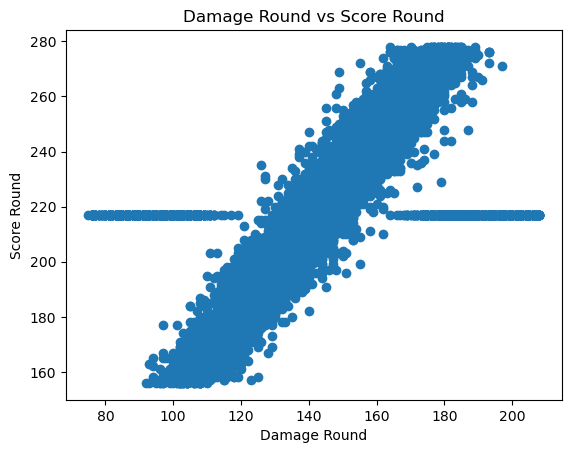

In [46]:
fig, ax = plt.subplots()

ax.set_title('Damage Round vs Score Round')
ax.set_xlabel('Damage Round')
ax.set_ylabel('Score Round')

ax.scatter(dataframe['damage_round'],dataframe['score_round'])
plt.show()

Pada Grafik diatas, dapat dikatakan bahwa Damage Round memiliki korelasi positif terhdap Score Round. Hal ini mengartikan bahwa jika player memberikan damage round yang tinggi maka hal ini akan berpengaruh positif juga terhadap Score Round. Hal ini dibuktikan dengan grafik diatas, dimana titik titik pada grafik tidak tersebar, tetapi menumpuk menjadi satu arah ke arah kanan atas.

In [47]:
dataframe.to_csv('ValorantTableau.csv')

# Kesimpulan

Kesimpulan :
1.  Dari data Senjata dan jumlah kill dibuktikan bahwa kedua variabel ini memiliki korelasi. Dimana nilai P value adalah 0.0. Sehingga dapat dikatakan bahwa Pemilihan senjata sangat penting dari jenis senjatanya. dikarenakan jika player memilih menggunakan senjata berjenis riffle dengan Vandal atau Phantom. Maka kesempatan player mendapatkan kill sangat tinggi. Sehingga hal ini bisa dijakan sebagai META atau stratgei dengan membunuh player lawan dengan senjata Vandal atau Phantom, maka kesempatan tim untuk menang akan lebih tinggi
2.  Dari Hasil Perhitungan Central Tedency (Mean, Median dan Standar Deviasi) didapatkan bahwa : median memiliki nilai yang lebih besar dari standar deviasi yaitu 25 > 4.99. Sehingga distribusi datanya sangat besar.
3. Dari data region dengan Headshot percent dapat dikatakan bahwa untuk region Europe memiliki tingkat headshot 39.2%. Hal ini mengindikasi bahwa strategi yang dilakukan oleh player player di region Europe menggunakan metode Headshot untuk membunuh lawan. Berbeda di region lain seperti North America, Asia Pasific, Korea, Brazil, Latin America yang memiliki tingkat presentase headshot dibawah negara europe (39.2%). Hal ini mengindikasi bahwa pada negara-negara tersebut, player membunuh lawannya dengan bisa menembaki badan atau kaki lawannya. Sehingga untuk META meningkatkan presentase winrate bisa dilakukan dengan cara membunuh lawan menggunakan strategi headshot.
4.  Pada data clutch dapat dikatakan bahwa rank tertinggi untuk melakukan atau mendapatkan clutch adalah radiant dengan menggunakan jenis senjata Machine Gun. Sehingga META atau strategi yang bisa digunakan didalam tim adalah dengan cara player mencapai rating atau level tertinggi pada valorant yaitu radiant hal ini bertujuan untuk mendapatkan gamesense. Dan disarankan bahwa terdapat player yang menggunakan jenis senjata Machine Gun.
5.  Dari data agent, agent type dan jumlah win. META atau strategi yang bisa diterapkan kedalam tim adalah menggunakan seluruh agent type dengan masing-masing agent yang memiliki jumlah kemenangan terbanyak. Seperti memilih untuk menggunakan duelist dengan jett, Initiator dengan menggunakan fade, Sentinel dengan menggunakan Chamber, dan Controller dengan menggunakan Omen.
6.  Pada data Damage Round dengan Score Round, META atau strategi yang bisa diterapkan kedalam tim adalah dengan cara memberikan damage yang tinggi kepada musuh. Sehingga hal ini akan otomatis meningkatakn Score Round tiap player. Hal ini bisa memberikan kesempatan menang untuk tim. 